Stability of Defection
----------------------

In [28]:
import opt_mo
import sympy as sym

In [29]:
import numpy as np
import itertools
import axelrod as axl
import matplotlib.pyplot as plt

In [30]:
sym.init_printing()

In [31]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4")
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4")

p, q = (p_1, p_2, p_3, p_4), (q_1, q_2, q_3, q_4)

In [71]:
def defection_stability_condition(opponents):
    differences = []
    for opponent in opponents:
        rhs = opt_mo.utility.linear_term_numerator(opponent) * opt_mo.utility.constant_term_denominator(opponent)
        lhs = opt_mo.utility.linear_term_denominator(opponent) * opt_mo.utility.constant_term_numerator(opponent)
        
        differences.append(rhs - lhs)
    total = sum(differences)
    
    return all([row <= 10 ** -8 for row in total])

In [72]:
first_opponent = [1/2, 7/10, 3/5, 1/2]
second_opponent = [2/5, 3/5, 2/5, 4/5]

In [73]:
other_second_opponent = [2/5, 1/50, 3/5, 2/5]

In [74]:
opponents = [first_opponent, second_opponent]

In [75]:
defection_stability_condition(opponents)

True

In [76]:
opponents = [first_opponent, other_second_opponent]
defection_stability_condition(opponents)

True

In [77]:
first_set = [axl.MemoryOnePlayer(p) for p in [first_opponent, second_opponent]] + [axl.Defector()]
second_set = [axl.MemoryOnePlayer(p) for p in [first_opponent, other_second_opponent]] + [axl.Defector()]

In [40]:
fixation_probabilites = []
for seed in range(10000):
    axl.seed(seed)  
    mp = axl.MoranProcess(players=first_set, turns=500)
    populations = mp.play()
    winners.append(mp.winning_strategy_name)

In [148]:
count = winners.count('Defector') / len(winners)

In [149]:
count

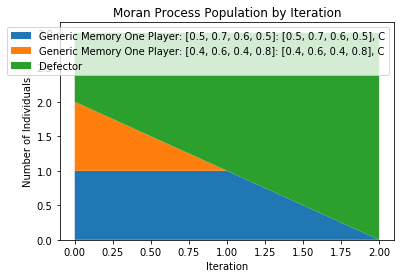

In [70]:
ax = mp.populations_plot()
plt.show() 

In [73]:
axl.seed(1)  
mp = axl.MoranProcess(players=second_set, turns=200)
populations = mp.play()
mp.winning_strategy_name

'Generic Memory One Player: [0.4, 0.02, 0.6, 0.4]: [0.4, 0.02, 0.6, 0.4], C'

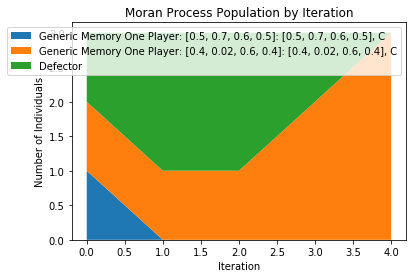

In [74]:
ax = mp.populations_plot()
plt.show() 

In [81]:
from scipy.integrate import odeint

t = np.linspace(0, 1000, 1000)  # Obtain 200 time points

In [20]:
x_1, x_2, x_3 = sym.symbols('x_1, x_2, x_3')

In [21]:
def create_A(players):
    rows = [[opt_mo.match_utility(player, opponent) for opponent in players] for player in players]
    return np.array(rows)

In [22]:
players = [first_opponent, second_opponent, (0, 0, 0, 0)]

In [23]:
def dx(x, t, A):
    """ ... Define the derivate of x. ... """
    f = np.dot(A, x)
    phi = np.dot(f, x)
    return x * (f - phi)

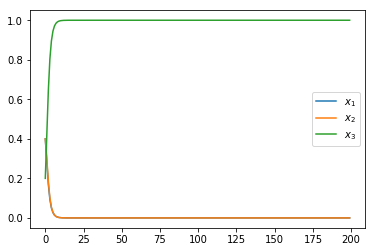

In [24]:
xs = odeint(func=dx, y0=[.4, .4, .2], t=t, args=(create_A(players),))

plt.figure()
for x, label in zip(zip(*xs), ("$x_1$", "$x_2$", "$x_3$")):
    plt.plot(x, label=label);
plt.legend();

/anaconda3/envs/opt-mo/lib/python3.6/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


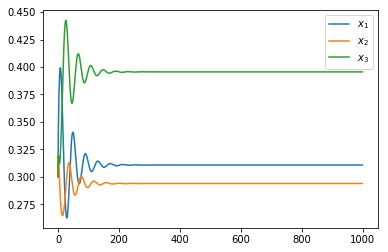

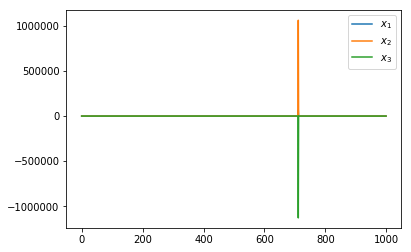

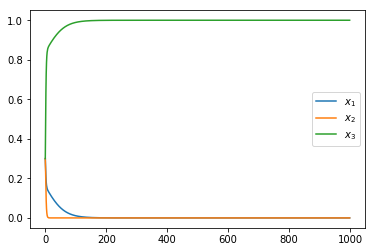

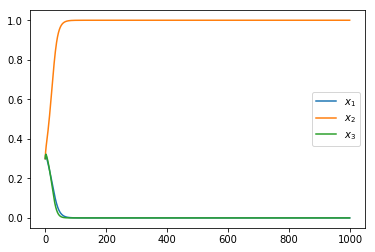

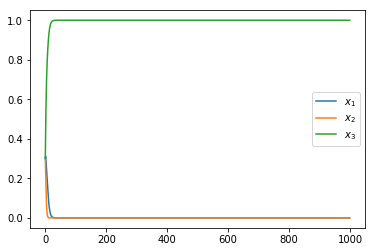

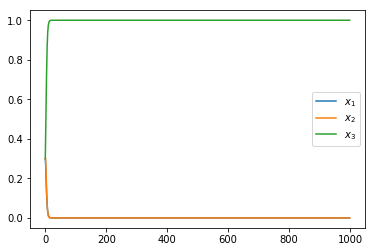

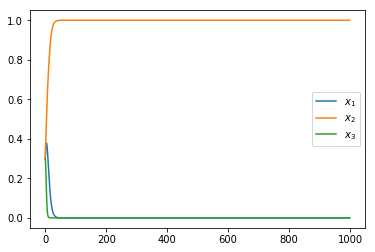

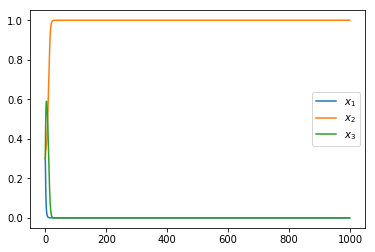

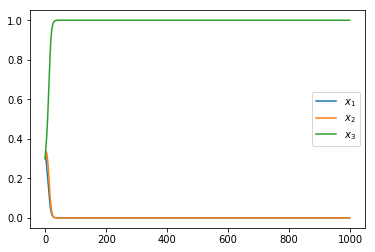

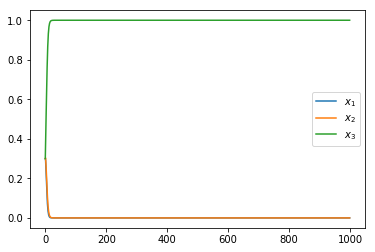

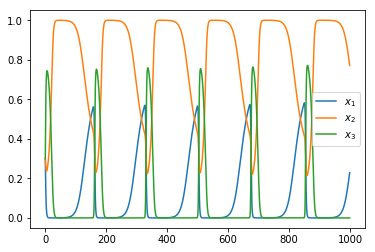

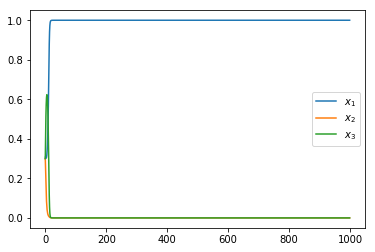

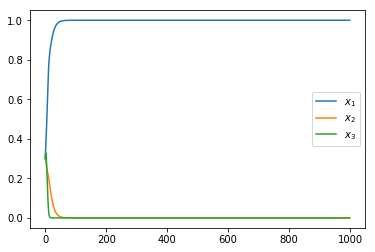

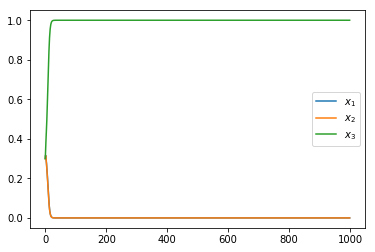

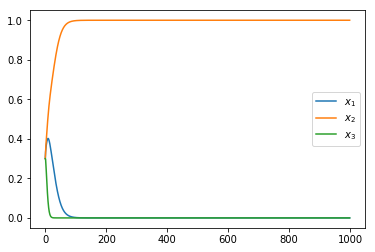

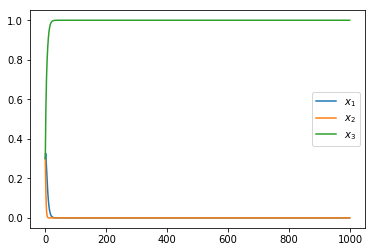

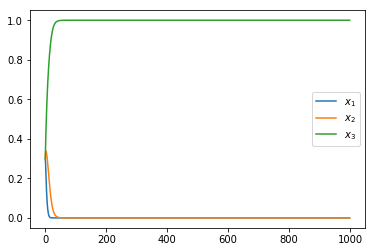

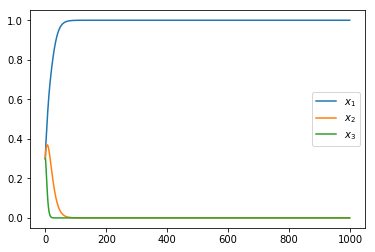

In [82]:
for seed in range(100):
    np.random.seed(seed)
    players = [[np.random.random() for _ in range(4)] for _ in range(2)]
    if defection_stability_condition(players) == False:
        players += [(0, 0, 0, 0)]
        xs = odeint(func=dx, y0=[.3, .3, .3], t=t, args=(create_A(players),))

        plt.figure()
        for x, label in zip(zip(*xs), ("$x_1$", "$x_2$", "$x_3$")):
            plt.plot(x, label=label);
        plt.legend();

In [79]:
for seed in range(100):
    np.random.seed(seed)
    opponents = [[np.random.random() for _ in range(4)] for _ in range(2)]
    if defection_stability_condition(opponents) == False:
        print(seed)

4
6
14
16
18
24
30
31
36
53
55
56
59
61
68
71
94
99


In [83]:
tournament = axl.Tournament(first_set)
results = tournament.play()
eco = axl.Ecosystem(results)
eco.reproduce(100)

Analysing: 100%|██████████| 25/25 [00:00<00:00, 147.67it/s]


/anaconda3/envs/opt-mo/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


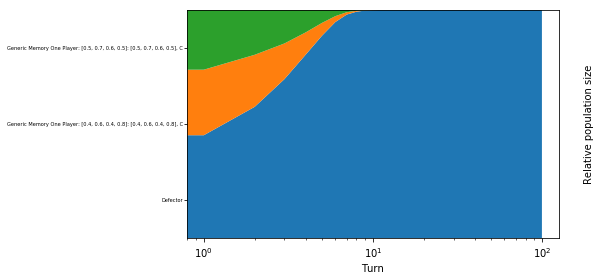

In [84]:
plot = axl.Plot(results)
p = plot.stackplot(eco)
p.show()